# Introduction
In this notebook, we analyse the changes in option greeks (delta, gamma, theta, vega) for various strategies.

# Black Scholes Model

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [22]:
N = norm.cdf

def d1(S, K, r, T, sigma):
    return (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))

def d2(S, K, r, T, sigma):
    return d1(S, K, r, T, sigma) - sigma * np.sqrt(T)

def BS_CALL(S, K, T, r, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return S * N(d1_value) - K * np.exp(-r*T)* N(d2_value)

def BS_PUT(S, K, T, r, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return K*np.exp(-r*T)*N(-d2_value) - S*N(-d1_value)

# Constant Variables for Analysis
Throughout this analysis, we will assume the following default values for each factor that drives options prices:

In [23]:
S = 100         # Spot price (Change this to analyse ATM, OTM and ITM options)
K = 100         # Strike price
t = 30          # Time to maturity in DAYS
r = 0.05        # Risk-free interest rate
sigma = 0.5     # Volatility of the underlying

# Option Greeks Formulas

In [46]:
def delta_call(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return norm.cdf(d1_value)

def delta_put(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return norm.cdf(d1_value) - 1

def gamma_call(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return norm.pdf(d1_value) / (S * sigma * np.sqrt(T))

def theta_call(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return (-S * norm.pdf(d1_value) * sigma / (2 * np.sqrt(T))) - (r * K * np.exp(-r * T) * norm.cdf(d2_value))

def theta_put(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    d2_value = d2(S, K, r, T, sigma)
    return (-S * norm.pdf(d1_value) * sigma / (2 * np.sqrt(T))) + (r * K * np.exp(-r * T) * norm.cdf(-d2_value))

def vega(S, K, r, T, sigma):
    d1_value = d1(S, K, r, T, sigma)
    return S * norm.pdf(d1_value) * np.sqrt(T) / 100

## Bull Call (Debit) Spread
This strategies involves:
- 1 Buy OTM K1 Call @ P1
- 1 Sell OTM K2 Call @ P2

where K1 < K2 (and P1 > P2).

In [47]:
K1 = 150
K2 = 200

In [64]:
def bull_call_spread(K1, K2, r, t, sigma):
    S = np.arange(K1 * 0.5, K2 * 1.5, 1)
    plt.figure(figsize=(20, 5))

    # Plot Delta
    lo_call_deltas = delta_call(S, K1, r, t/365, sigma)             # Long
    hi_call_deltas = delta_call(S, K2, r, t/365, sigma) * -1        # Short
    ov_call_deltas = lo_call_deltas + hi_call_deltas
    plt.subplot(1, 4, 1)
    plt.title('Bull Call Spread Analysis - Delta')
    plt.xlabel('Spot Price')
    plt.ylabel('Delta')
    plt.plot(S, ov_call_deltas, label='Delta')
    plt.legend()

    # Plot Gamma
    lo_call_gammas = gamma_call(S, K1, r, t/365, sigma)             # Long
    hi_call_gammas = gamma_call(S, K2, r, t/365, sigma) * -1        # Short
    ov_call_gammas = lo_call_gammas + hi_call_gammas
    plt.subplot(1, 4, 2)
    plt.title('Bull Call Spread Analysis - Gamma')
    plt.xlabel('Spot Price')
    plt.ylabel('Gamma')
    plt.plot(S, ov_call_gammas, label='Gamma')
    plt.legend()

    # Plot Theta
    lo_call_thetas = theta_call(S, K1, r, t/365, sigma)             # Long
    hi_call_thetas = theta_call(S, K2, r, t/365, sigma) * -1        # Short
    ov_call_thetas = lo_call_thetas + hi_call_thetas
    plt.subplot(1, 4, 3)
    plt.title('Bull Call Spread Analysis - Theta')
    plt.xlabel('Spot Price')
    plt.ylabel('Theta')
    plt.plot(S, ov_call_thetas, label='Theta')
    plt.legend()

    # Plot vega
    lo_call_vegas = vega(S, K1, r, t/365, sigma)                    # Long
    hi_call_vegas = vega(S, K2, r, t/365, sigma) * -1               # Short
    ov_call_vegas = lo_call_vegas + hi_call_vegas
    plt.subplot(1, 4, 4)
    plt.title('Bull Call Spread Analysis - Vega')
    plt.xlabel('Spot Price')
    plt.ylabel('Vega')
    plt.plot(S, ov_call_vegas, label='Vega')
    plt.legend()

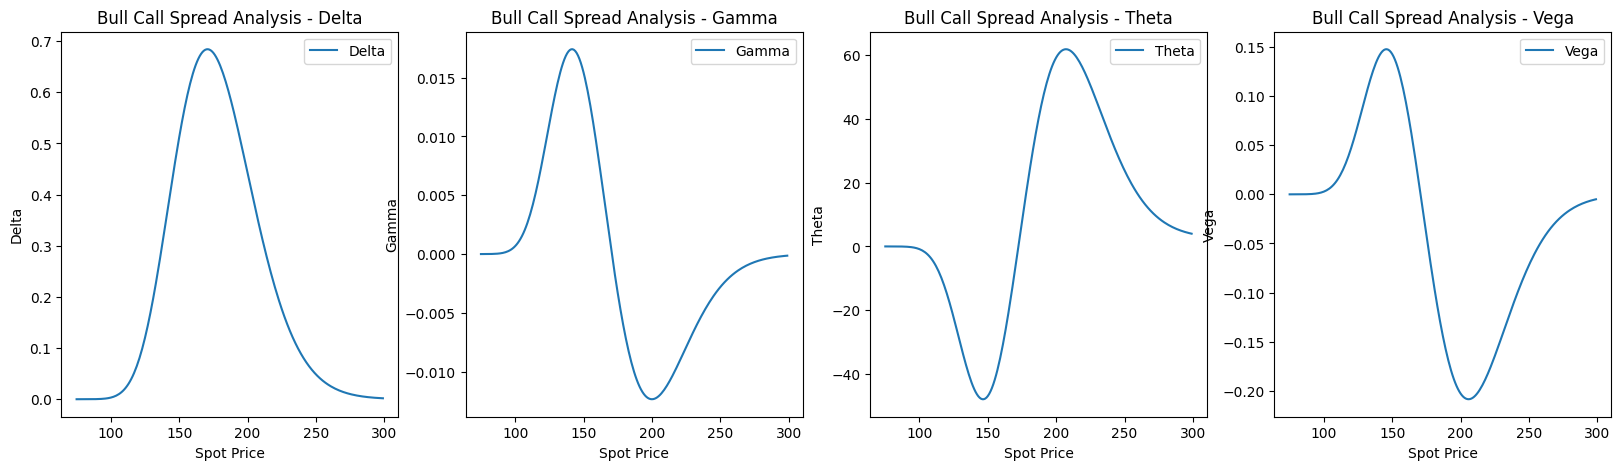

In [65]:
bull_call_spread(K1, K2, r, t, sigma)